#### Data Exploration and Understanding

In [23]:
import pandas as pd

# Load the dataset
file_path = 'laptop.csv'  # Update the path to your dataset
laptop_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
laptop_data_head = laptop_data.head()
print(laptop_data_head)



   Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.3

In [24]:

# Display the basic statistics of the dataset
laptop_data_info = laptop_data.info()
laptop_data_describe = laptop_data.describe()
print(laptop_data_info)
print(laptop_data_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
       Unnamed: 0.1   Unnamed: 0          Price
count    1303.00000  1273.000000    1273.000000
mean      651.00000   

#### Data Cleaning / Data Preprocessing

##### handling missing values,dropping unwanted rows and converting to appropriate datatypes

In [25]:
# Handle missing values by dropping rows with missing target variable 'Price'
laptop_data_cleaned = laptop_data.dropna(subset=['Price'])

# Remove rows with non-numeric values in 'Inches' and 'Weight'
laptop_data_cleaned = laptop_data_cleaned[(laptop_data['Inches'] != '?') & (laptop_data['Weight'] != '?')]

# Drop rows with any remaining missing values
laptop_data_cleaned = laptop_data_cleaned.dropna()

# Convert columns to appropriate data types
laptop_data_cleaned['Inches'] = laptop_data_cleaned['Inches'].str.replace('"', '').astype(float)
laptop_data_cleaned['Weight'] = laptop_data_cleaned['Weight'].str.replace('kg', '').astype(float)
laptop_data_cleaned['Ram'] = laptop_data_cleaned['Ram'].str.replace('GB', '').astype(int)

# Drop unwanted columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
laptop_data_cleaned = laptop_data_cleaned.drop(columns=columns_to_drop)

# Drop the first two rows using drop function
laptop_data_cleaned = laptop_data_cleaned.drop(laptop_data_cleaned.index[:2])

# Verify the updated dataframe
laptop_data_cleaned_info = laptop_data_cleaned.info()
laptop_data_cleaned_head = laptop_data_cleaned.head()
print(laptop_data_cleaned_info)
print(laptop_data_cleaned_head)


<class 'pandas.core.frame.DataFrame'>
Index: 1269 entries, 2 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1269 non-null   object 
 1   TypeName          1269 non-null   object 
 2   Inches            1269 non-null   float64
 3   ScreenResolution  1269 non-null   object 
 4   Cpu               1269 non-null   object 
 5   Ram               1269 non-null   int32  
 6   Memory            1269 non-null   object 
 7   Gpu               1269 non-null   object 
 8   OpSys             1269 non-null   object 
 9   Weight            1269 non-null   float64
 10  Price             1269 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.0+ KB
None
  Company   TypeName  Inches                    ScreenResolution  \
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ult

C:\Users\MY PC\AppData\Local\Temp\ipykernel_25864\2584781403.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  laptop_data_cleaned = laptop_data_cleaned[(laptop_data['Inches'] != '?') & (laptop_data['Weight'] != '?')]


#### Visualization of data

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

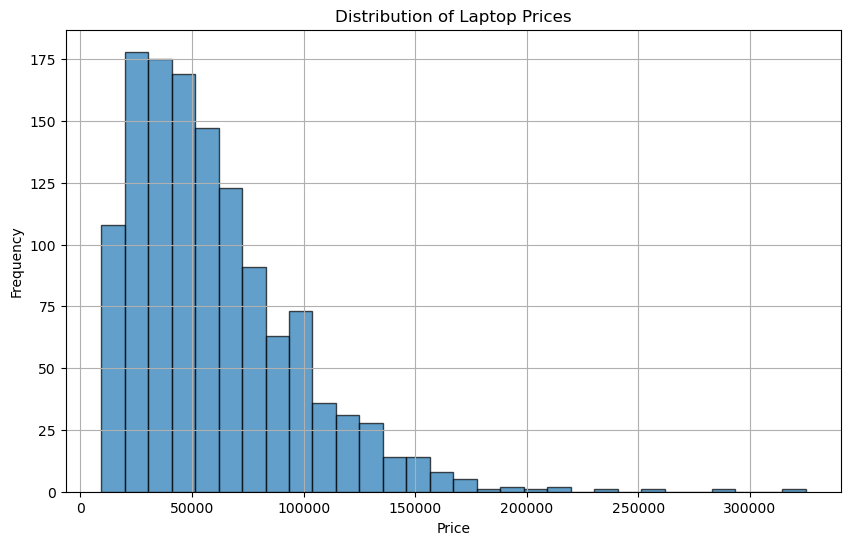

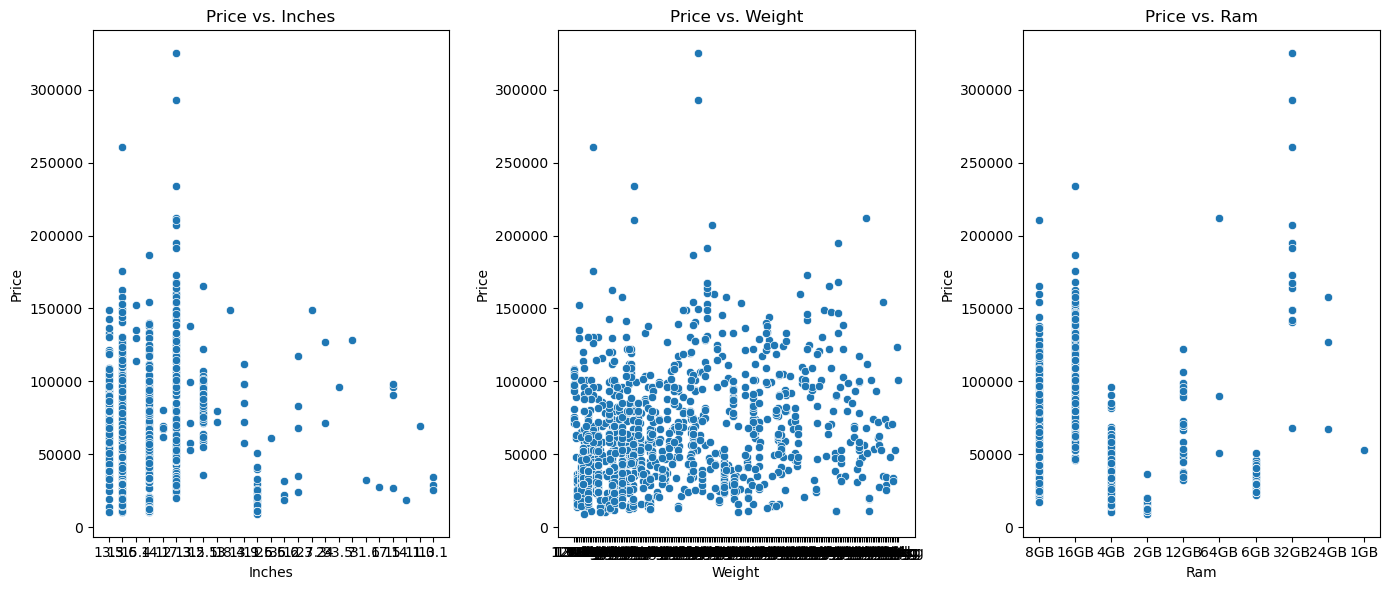

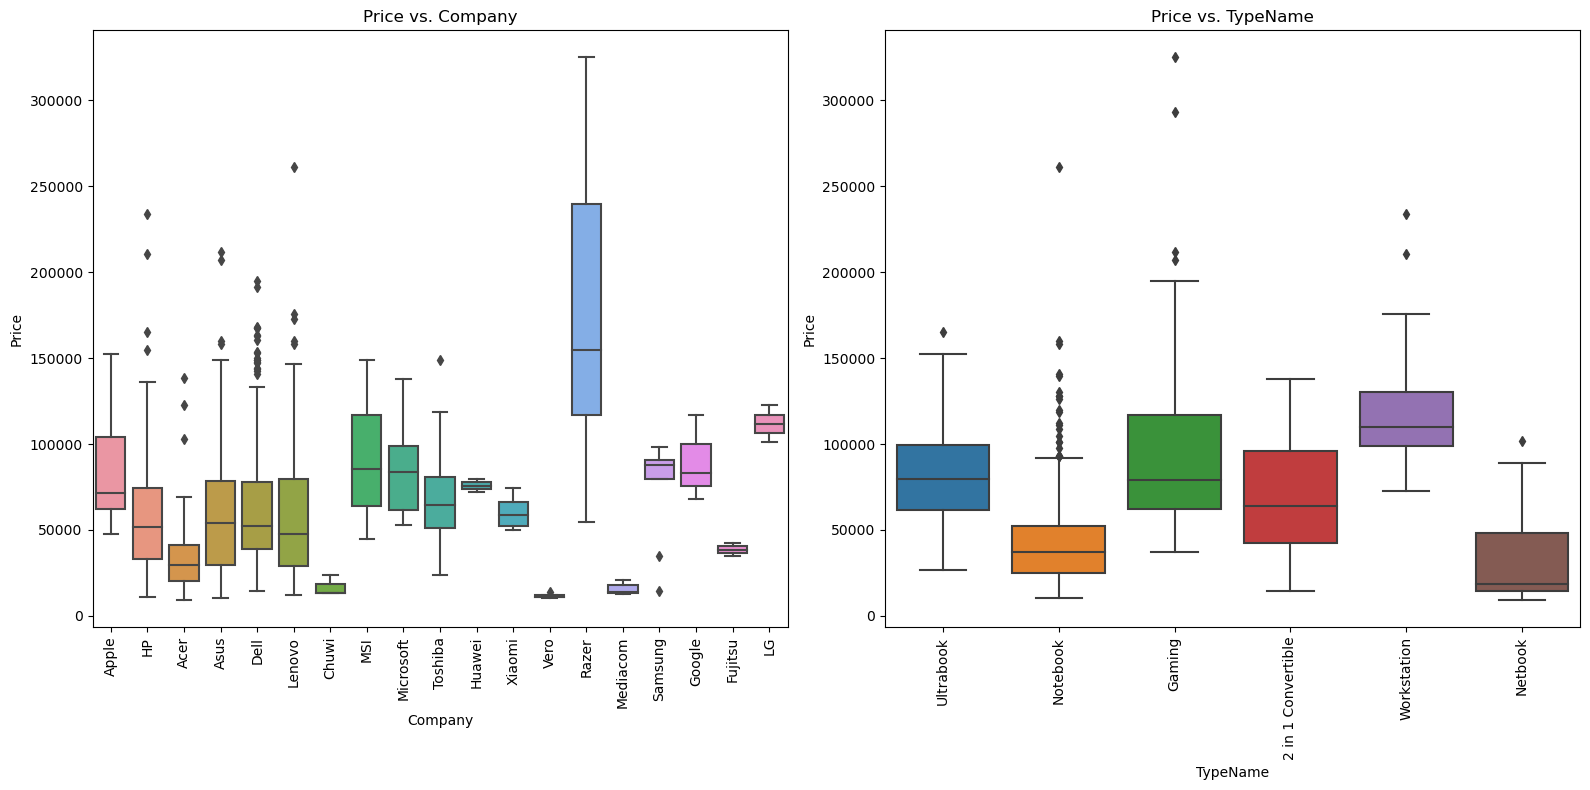

In [27]:
# Plot the distribution of laptop prices
plt.figure(figsize=(10, 6))
plt.hist(laptop_data['Price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plots for numerical features vs. Price
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Inches', y='Price', data=laptop_data)
plt.title('Price vs. Inches')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Weight', y='Price', data=laptop_data)
plt.title('Price vs. Weight')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Ram', y='Price', data=laptop_data)
plt.title('Price vs. Ram')

plt.tight_layout()
plt.show()

# Box plots for categorical features vs. Price
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Company', y='Price', data=laptop_data)
plt.title('Price vs. Company')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='TypeName', y='Price', data=laptop_data)
plt.title('Price vs. TypeName')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Handling the outliers with capping

In [28]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Apply outlier capping to numerical features
numerical_features = ['Inches', 'Weight', 'Ram', 'Price']
for feature in numerical_features:
    laptop_data_cleaned = cap_outliers(laptop_data_cleaned, feature)



#### Feature Engineering

In [29]:
def extract_resolution(df):
    valid_resolutions = df['ScreenResolution'].str.contains(r'\d+x\d+')
    df = df[valid_resolutions]
    df[['ResolutionX', 'ResolutionY']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
    df['PPI'] = (((df['ResolutionX'] ** 2) + (df['ResolutionY'] ** 2)) ** 0.5) / df['Inches']
    df.drop(columns=['ScreenResolution'], inplace=True)
    return df

# Apply the function to the cleaned dataset
laptop_data_cleaned = extract_resolution(laptop_data_cleaned)

# Display the first few rows to verify the changes
print(laptop_data_cleaned.head())


  Company   TypeName  Inches                         Cpu   Ram  \
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  14.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   
5    Acer   Notebook    15.6     AMD A9-Series 9420 3GHz   4.0   
6   Apple  Ultrabook    15.4        Intel Core i7 2.2GHz  14.0   

                Memory                           Gpu       OpSys  Weight  \
2            256GB SSD         Intel HD Graphics 620       No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455       macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650       macOS    1.37   
5            500GB HDD                 AMD Radeon R5  Windows 10    2.10   
6  256GB Flash Storage       Intel Iris Pro Graphics    Mac OS X    2.04   

         Price  ResolutionX  ResolutionY         PPI  
2   30636.0000         1920         1080  141.211998  
3  135195.3360         2880         

#### Handling encoding that has too many columns

In [30]:
def target_encoding(df, column, target):
    means = df.groupby(column)[target].mean()
    df[column] = df[column].map(means)
    return df

# Apply target encoding to all categorical columns
categorical_columns = laptop_data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    laptop_data_cleaned = target_encoding(laptop_data_cleaned, column, 'Price')

laptop_data_cleaned

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionX,ResolutionY,PPI
2,56605.156728,41365.516269,15.6,49103.165351,8.0,64903.717696,60900.481116,31892.934400,1.86,30636.0000,1920,1080,141.211998
3,85740.181011,83116.366391,15.4,135195.336000,14.0,97920.902917,135195.336000,99161.563418,1.83,135195.3360,2880,1800,220.534624
4,85740.181011,83116.366391,13.3,102393.504000,8.0,64903.717696,102393.504000,99161.563418,1.37,96095.8080,2560,1600,226.983005
5,33394.615969,41365.516269,15.6,23980.310836,4.0,33581.929071,23660.630836,61320.617618,2.10,21312.0000,1366,768,100.454670
6,85740.181011,83116.366391,15.4,114017.601600,14.0,77540.182200,114017.601600,67285.780200,2.04,114017.6016,2880,1800,220.534624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,57468.920450,68186.738110,14.0,68139.911608,4.0,37597.550203,56279.802351,61320.617618,1.80,33992.6400,1920,1080,157.350512
1299,57468.920450,68186.738110,13.3,68139.911608,14.0,97920.902917,56279.802351,61320.617618,1.30,79866.7200,3200,1800,276.053530
1300,57468.920450,41365.516269,14.0,17286.938182,2.0,23656.928914,21197.117297,61320.617618,1.50,12201.1200,1366,768,111.935204
1301,56605.156728,41365.516269,15.6,68139.911608,6.0,35834.341770,39834.335314,61320.617618,2.19,40705.9200,1366,768,100.454670


##### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to scale the numerical features
scaler = StandardScaler()
numerical_features = ['Inches', 'Weight', 'Ram', 'ResolutionX', 'ResolutionY', 'PPI']

# Fit and transform the scaler on the numerical features
laptop_data_cleaned[numerical_features] = scaler.fit_transform(laptop_data_cleaned[numerical_features])
laptop_data_cleaned[categorical_columns]=scaler.fit_transform(laptop_data_cleaned[categorical_columns])

print(laptop_data_cleaned[categorical_columns].head())
# Verify the scaled features
print(laptop_data_cleaned[numerical_features].head())


    Company  TypeName       Cpu    Memory       Gpu     OpSys
2 -0.186487 -0.801180 -0.363111  0.221727  0.068115 -2.345627
3  1.997250  1.085693  2.766099  1.481653  2.868263  3.455307
4  1.997250  1.085693  1.573844  0.221727  1.631973  3.455307
5 -1.926170 -0.801180 -1.276257 -0.973504 -1.335443  0.192079
6  1.997250  1.085693  1.996348  0.703931  2.070081  0.706487
     Inches    Weight       Ram  ResolutionX  ResolutionY       PPI
2  0.384285 -0.279219  0.065278     0.052578     0.034325 -0.116542
3  0.244214 -0.328333  1.809223     1.994873     2.566794  1.729136
4 -1.226532 -1.081423  0.065278     1.347441     1.863330  1.879177
5  0.384285  0.113698 -1.097352    -1.068288    -1.063078 -1.064884
6  0.244214  0.015468  1.809223     1.994873     2.566794  1.729136


##### Model training and evaluation

In [32]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib

# Define features and target columns
features = laptop_data_cleaned.drop(columns=['Price'])
target = laptop_data_cleaned['Price']

# Define numerical and categorical features
numeric_features = ['Inches', 'Ram', 'Weight', 'ResolutionX', 'ResolutionY', 'PPI']
categorical_features = ['Company', 'TypeName', 'Cpu', 'Memory', 'Gpu', 'OpSys']

# Define preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    return mse, r2, cv_scores.mean()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    mse, r2, cv_mean_score = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MSE': mse, 'R²': r2, 'CV Mean R²': cv_mean_score}

results_df = pd.DataFrame(results).T
print(results_df)



                            MSE        R²  CV Mean R²
Linear Regression  2.763362e+08  0.748583   -0.648776
Random Forest      1.536587e+08  0.860198    0.819600
Gradient Boosting  1.724817e+08  0.843072    0.814514
XGBoost            1.474687e+08  0.865830    0.835764


#### Evaluating The best Model

In [33]:
from sklearn.model_selection import GridSearchCV

# Select the best model based on R² score
best_model_name = results_df['R²'].idxmax()
print(f"The best model is: {best_model_name}")
best_model = models[best_model_name]

# Define hyperparameters grid for tuning
if best_model_name == 'Linear Regression':
    param_grid = {
        'model__normalize': [True, False]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }

# Create a pipeline for the best model
pipeline = Pipeline(steps=[('model', best_model)])
# Perform Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best model and parameters
best_model_enhanced = grid_search.best_estimator_
best_params = grid_search.best_params_
# Predict on the test set
y_pred = best_model_enhanced.predict(X_test)
# Evaluate the enhanced model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Parameters after enhancement:", best_params)
print("Enhanced Model MSE:", mse)
print("Enhanced Model R²:", r2)


The best model is: XGBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters after enhancement: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200}
Enhanced Model MSE: 95305723.15830411
Enhanced Model R²: 0.9132886673929806


In [44]:

# Calculate accuracy scores out of 100
accuracy_initial = r2 * 100
# Print accuracy scores
print(f"Best Model Accuracy: {accuracy_initial:.2f}%")



Best Model Accuracy: 91.33%


In [36]:
laptop_data_cleaned.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionX,ResolutionY,PPI
1017,-0.121746,-0.80118,1.574888,2.358816,1.809223,1.481653,3.443635,2.356528,0.604843,150461.388,3.937168,3.833028,2.523429


In [37]:
laptop_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269 entries, 2 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1269 non-null   float64
 1   TypeName     1269 non-null   float64
 2   Inches       1269 non-null   float64
 3   Cpu          1269 non-null   float64
 4   Ram          1269 non-null   float64
 5   Memory       1269 non-null   float64
 6   Gpu          1269 non-null   float64
 7   OpSys        1269 non-null   float64
 8   Weight       1269 non-null   float64
 9   Price        1269 non-null   float64
 10  ResolutionX  1269 non-null   float64
 11  ResolutionY  1269 non-null   float64
 12  PPI          1269 non-null   float64
dtypes: float64(13)
memory usage: 138.8 KB


Distribution of Laptop Prices

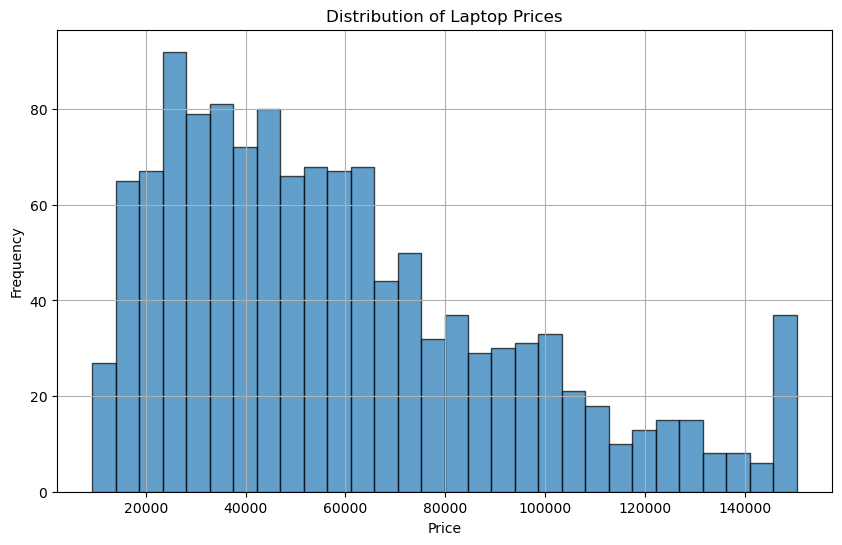

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(laptop_data_cleaned['Price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Key predictors

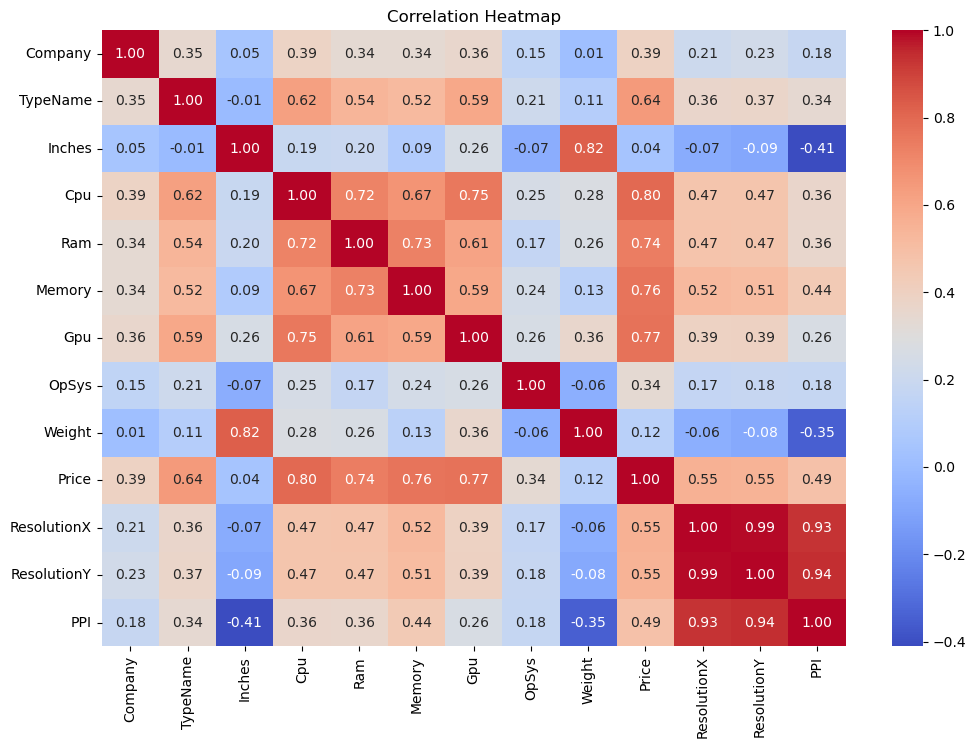

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(laptop_data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


 Pairplot of Key Features vs. Price

c:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


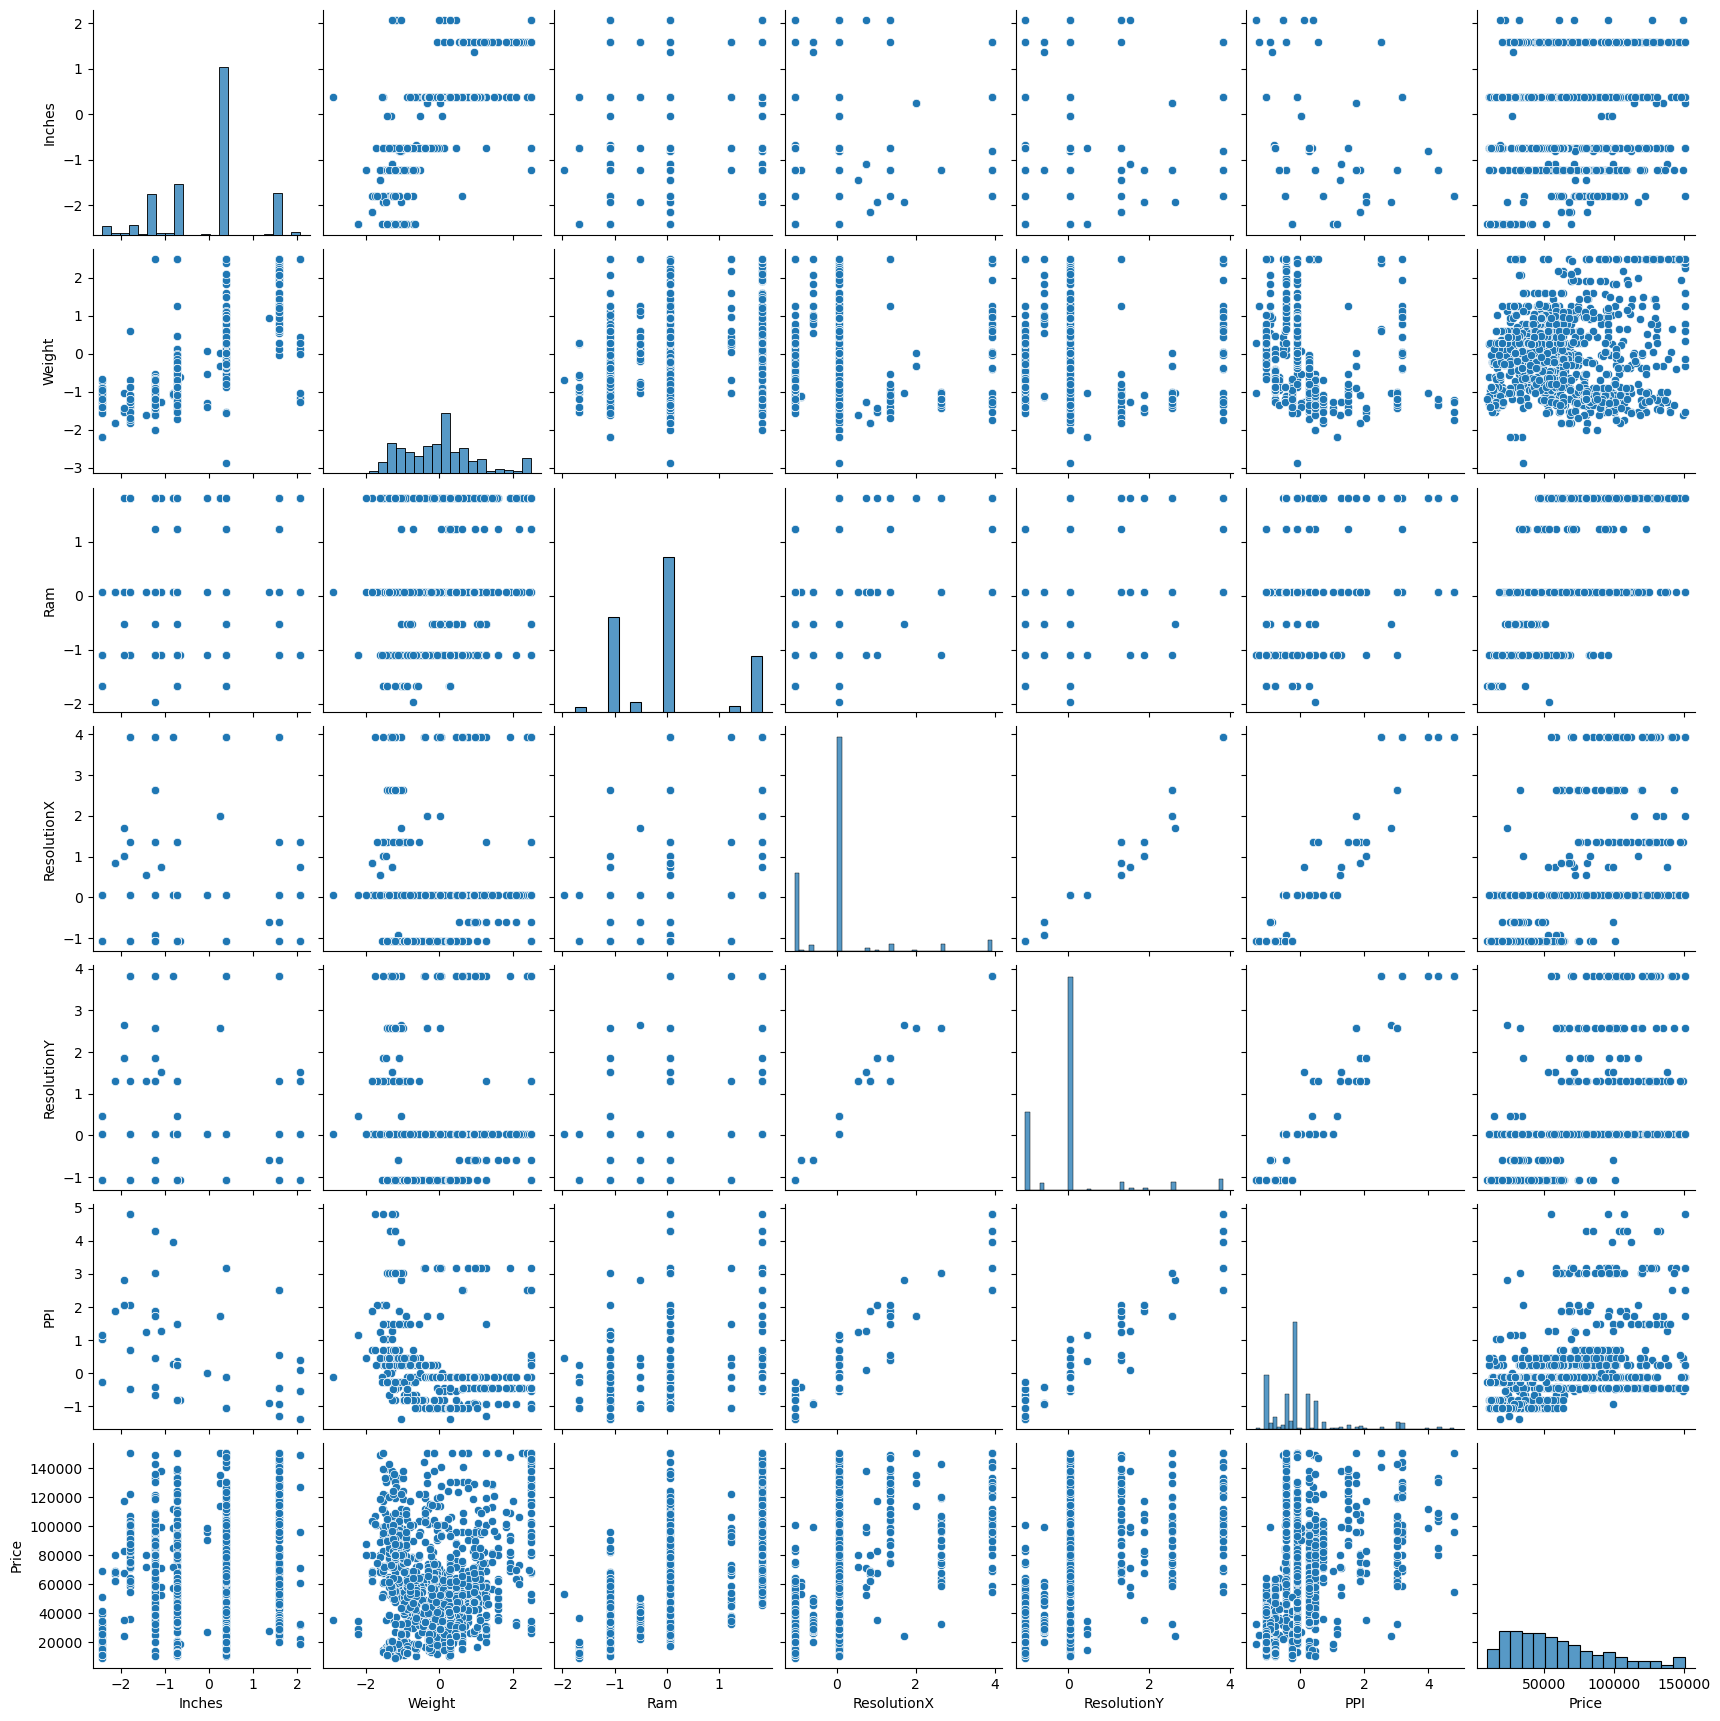

In [40]:
key_features = ['Inches', 'Weight', 'Ram', 'ResolutionX', 'ResolutionY', 'PPI', 'Price']

sns.pairplot(laptop_data_cleaned[key_features])
plt.show()

Box Plot of Prices by Company

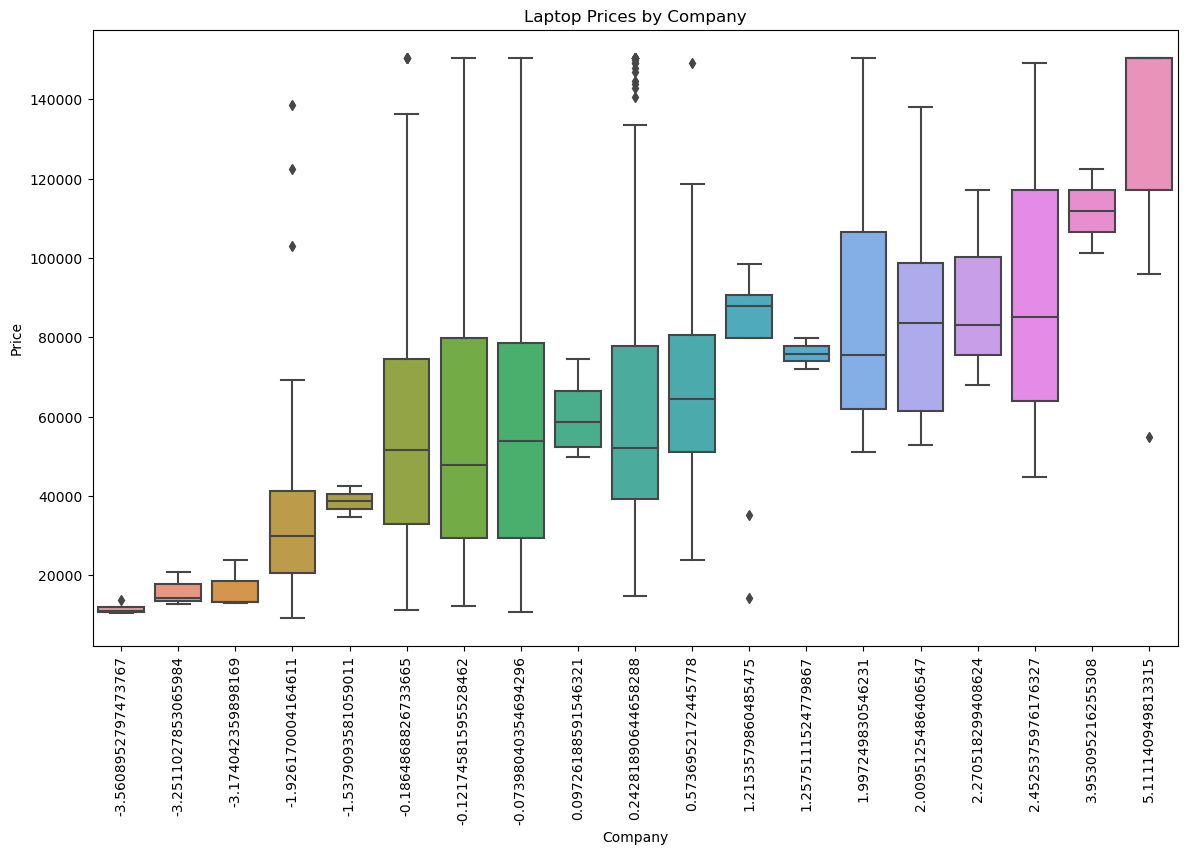

In [41]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company', y='Price', data=laptop_data_cleaned)
plt.xticks(rotation=90)
plt.title('Laptop Prices by Company')
plt.show()

#### Recommendation

Recommendations for SmartTech Co.
Strategic Pricing:

Utilize the insights from the correlation heatmap to focus on key features (Ram, PPI, Weight) that significantly impact prices.
Position laptops with higher RAM and better display resolution in a premium pricing segment.
Brand Positioning:

Leverage brand influence on pricing. If certain brands command higher prices, SmartTech Co. can emphasize these brands in their marketing strategies.
For lesser-known brands, highlight unique selling points (e.g., superior specifications at a lower price) to attract cost-conscious consumers.
Market Segmentation:

Use the price distribution data to segment the market into different price ranges (e.g., budget, mid-range, premium).
Tailor marketing strategies and product offerings to each segment.
Feature Enhancement:

Based on the pairplot analysis, invest in enhancing features that drive price (e.g., increasing RAM, improving display resolution) to justify higher pricing.
Real-time Pricing Adjustments:

Implement a dynamic pricing model using the trained machine learning model to adjust prices in real-time based on changes in feature configurations and market demand.
Consumer Education:

Educate consumers on the benefits of high-impact features (e.g., higher PPI, more RAM) to drive demand for higher-end models.

Company: Lenovo
TypeName: Ultrabook
Inches: 13.3
Ram (GB): 8
Weight (kg): 1.2
ResolutionX: 1920
ResolutionY: 1080
OpSys: Windows 10
Cpu: Intel Core i7
Memory: 512GB SSD
Gpu: Intel UHD Graphics
PPI: 165.63

In [42]:

# Save the best model and preprocessor
best_model_name = 'XGBoost'  # XGBoost is the best model 
best_model = models[best_model_name]
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
final_pipeline.fit(features, target)
joblib.dump(final_pipeline, 'laptop_price_model.pkl')

# Load the pre-trained model
model = joblib.load('laptop_price_model.pkl')

# Define the prediction function
def predict_laptop_price(Company, TypeName, Inches, Ram, Weight, ResolutionX, ResolutionY, OpSys, Cpu, Memory, Gpu, PPI):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Company': [Company],
        'TypeName': [TypeName],
        'Inches': [Inches],
        'Ram': [Ram],
        'Weight': [Weight],
        'ResolutionX': [ResolutionX],
        'ResolutionY': [ResolutionY],
        'OpSys': [OpSys],
        'Cpu': [Cpu],
        'Memory': [Memory],
        'Gpu': [Gpu],
        'PPI': [PPI]
    })
    
    # Ensure correct data types for categorical columns
    input_data['Company'] = input_data['Company'].astype('category')
    input_data['TypeName'] = input_data['TypeName'].astype('category')
    input_data['OpSys'] = input_data['OpSys'].astype('category')
    input_data['Cpu'] = input_data['Cpu'].astype('category')
    input_data['Memory'] = input_data['Memory'].astype('category')
    input_data['Gpu'] = input_data['Gpu'].astype('category')
    
    # Debug print to verify input data
    print("Input DataFrame:")
    print(input_data)
    
    # Make the prediction
    try:
        prediction = model.predict(input_data)
        return prediction[0]
    except Exception as e:
        return str(e)

# Create the Gradio interface
import gradio as gr

inputs = [
    gr.Dropdown(choices=['Dell', 'Apple', 'HP', 'Lenovo', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Samsung', 'Razer'], label='Company'),
    gr.Dropdown(choices=['Ultrabook', 'Gaming', 'Notebook', '2 in 1 Convertible', 'Workstation'], label='TypeName'),
    gr.Number(label='Inches'),
    gr.Number(label='Ram (GB)'),
    gr.Number(label='Weight (kg)'),
    gr.Number(label='ResolutionX'),
    gr.Number(label='ResolutionY'),
    gr.Dropdown(choices=['Windows 10', 'Windows 7', 'macOS', 'Linux', 'No OS', 'Windows 10 S', 'Android'], label='OpSys'),
    gr.Dropdown(choices=['Intel Core i5', 'Intel Core i7', 'Intel Core i9', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 9'], label='Cpu'),
    gr.Dropdown(choices=['256GB SSD', '512GB SSD', '1TB SSD', '1TB HDD'], label='Memory'),
    gr.Dropdown(choices=['Intel UHD Graphics', 'AMD Radeon Pro 555X', 'NVIDIA GeForce RTX 2080', 'Intel Iris Plus Graphics', 'NVIDIA Quadro M2200'], label='Gpu'),
    gr.Number(label='PPI')
]

outputs = gr.Textbox(label='Predicted Price')

gr.Interface(fn=predict_laptop_price, inputs=inputs, outputs=outputs, title='Laptop Price Predictor').launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
